# Bioenergy Scenario Plots and Maps

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [5]:
# Load Excel summary and ADM1 shapefile
summary = pd.read_excel("results/ci_bioenergy_techpathways.xlsx", sheet_name="Summary")
adm1 = gpd.read_file("data/gadm41_CIV.gpkg", layer=1)

# Direct match by official district name
merged = adm1.merge(summary[summary["Year"] == 2030][["Region", "Total_Cost_USD"]], 
                    left_on="NAME_1", right_on="Region", how="left")

In [6]:
# Filter data for 2030, BAU
df = summary[(summary["Year"] == 2030) & (summary["Scenario"] == "bau")][["Region", "Total_Cost_USD"]]
df["Region_clean"] = df["Region"].apply(normalize_name)

# Merge for plotting
merged = adm1.merge(df, how="left", left_on="NAME_1_clean", right_on="Region_clean")

# Plot map
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column="Total_Cost_USD", cmap="OrRd", linewidth=0.8, edgecolor="0.9", legend=True, ax=ax)
ax.set_title("Household Cooking Fuel Cost by District (2030, BAU)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


KeyError: 'NAME_1_clean'

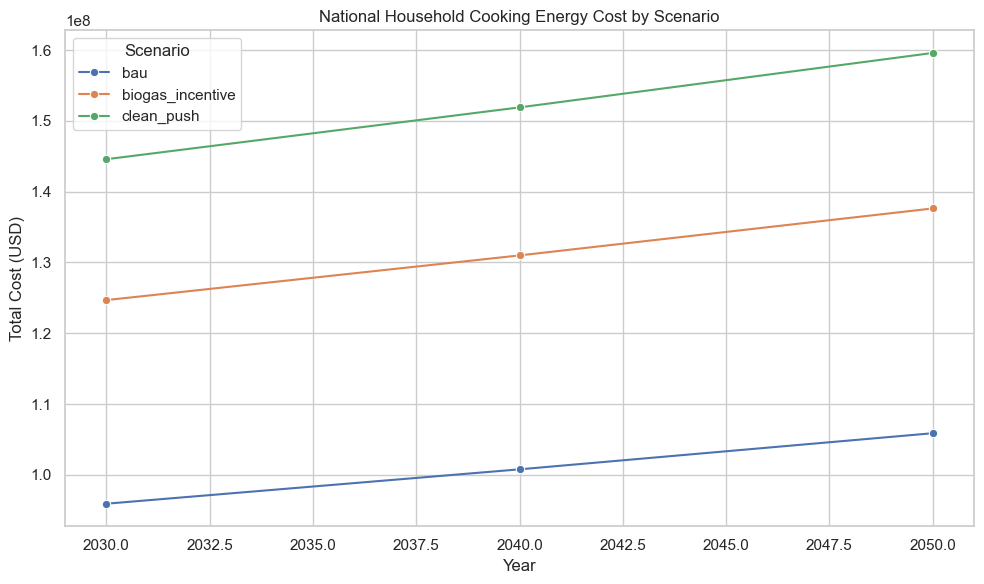

In [4]:
# Lineplot of total cost across years
scenario_trend = summary.groupby(["Year", "Scenario"])["Total_Cost_USD"].sum().reset_index()

sns.lineplot(data=scenario_trend, x="Year", y="Total_Cost_USD", hue="Scenario", marker="o")
plt.title("National Household Cooking Energy Cost by Scenario")
plt.ylabel("Total Cost (USD)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()
